# Problem Statement
## The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.



## Importing Libraries

In [1]:
#!pip install xgboost
#!pip install scikit-learn==1.3.0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
from scipy.stats import randint

import re  #regular expression
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.svm import SVC
import pickle

from sklearn.tree import export_graphviz
#from IPython.display import Image
#import graphviz

# Importing DataSet

We have saved the resume data in to csv file after performing EDA. We are going to use the same for further model building.

In [3]:
resume_data=pd.read_csv("Cleaned_Resume_Data.csv")

In [4]:
resume_data.head(5)

,Resume_Text,Category
0,anubhav kumar singh core competency scripting ...,0
1,g ananda rayudu httpswwwlinkedincominanandguda...,0
2,peoplesoft database administrator gangareddy p...,0
3,classification internal classification interna...,0
4,priyanka ramadoss mountpleasant coonoor nilgir...,0


# Feature Extraction

In [5]:
#We have to extract features from Resume_Text column

vectorizer = TfidfVectorizer()
#cv = TfidfVectorizer(max_features = 1000)
# X contains corpus (dependent variable)

X = vectorizer.fit_transform(resume_data.Resume_Text.values).toarray()
X=pd.DataFrame(X,columns=vectorizer.get_feature_names_out())

# Features/Target Column

In [6]:
#Features
X

,aa,ab,abdul,abilitiescommunication,ability,able,abovementioned,abreast,absence,absent,...,young,youre,yoursincerely,yr,zealand,zenefits,zero,zerozilla,zone,zp
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.029178,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.039849,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.021730,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.0,0.0,0.0,0.0,0.014787,0.0,0.000000,0.000000,0.043981,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.016287,0.0,0.000000,0.000000,0.169549,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
76,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.020512,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
77,0.0,0.0,0.0,0.0,0.016128,0.0,0.000000,0.000000,0.047972,0.0,...,0.0,0.0,0.0,0.0,0.035463,0.0,0.0,0.0,0.0,0.0


In [7]:
#Target Column
# Category is Target Column
Y=resume_data['Category']
Y

0     0
1     0
2     0
3     0
4     0
     ..
74    3
75    3
76    3
77    3
78    3
Name: Category, Length: 79, dtype: int64

# Split Train/Text data

In [8]:
#We are going to randomly split the data into Train and Text

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5, test_size=0.25,stratify=resume_data.Category.values)
X_train.shape, X_test.shape

((59, 4431), (20, 4431))

# Classification Model

## 1. Logistics Regression

In [11]:
#Build model
model_LR=LogisticRegression()
model_LR.fit(X_train,Y_train)

LogisticRegression()

In [12]:
# Model Co-efficient
model_LR.coef_

array([[ 0.00395717, -0.00371281, -0.01950566, ..., -0.01581305,
         0.01877489,  0.03468097],
       [-0.00147251, -0.00434278,  0.05074022, ...,  0.04387792,
        -0.0079839 ,  0.0005098 ],
       [-0.00132321, -0.00341695, -0.01660481, ..., -0.01472386,
        -0.00538672, -0.01845096],
       [-0.00116145,  0.01147255, -0.01462975, ..., -0.013341  ,
        -0.00540426, -0.01673981]])

In [13]:
#Model intercept
model_LR.intercept_

array([-0.01038023,  0.58435196, -0.18925473, -0.384717  ])

In [14]:
#Predicting values from model
Y_pred=model_LR.predict(X_test)
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [15]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[5, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

In [17]:
#Model Accuracy
ACC_LR=metrics.accuracy_score(Y_pred,Y_test)
ACC_LR

1.0

In [18]:
# DataFrame to compare models
results = pd.DataFrame({'Models':['Logistics Regression'],'Accuracy':[ACC_LR]})

## 2. Naive Bayes Algorithm

In [19]:
#Multinomial Naive Bayes Model
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(X_train, Y_train)

MultinomialNB(alpha=1, fit_prior=False)

In [20]:
#Predicting on test data
Y_pred = model_NB.predict(X_test) # predicting on test data set
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [21]:
#Accuracy of the model
acc_NB=metrics.accuracy_score(Y_pred,Y_test)
print(acc_NB)

1.0


In [22]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [23]:
#Adding to DataFrame to compare models
results=results.append({'Models':'Naive Bayes','Accuracy':acc_NB }, ignore_index=True)

## 3. K-Nearest Neighbors Classification

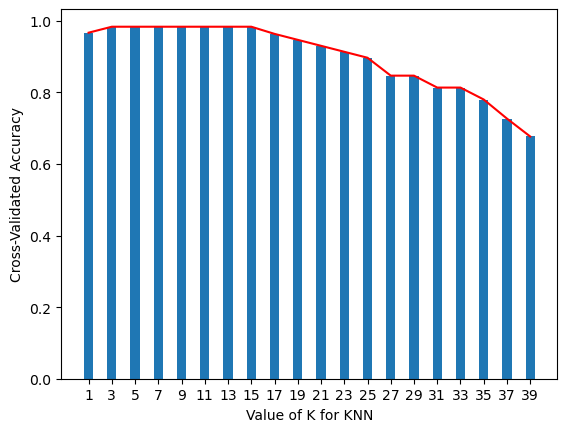

In [24]:
# First we will find the best value for k
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulate different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

Observation: As we can see Accuracy is same for k value between 1 to 19.
We can take any value between 1 to 19.

In [25]:
#K-Nearest neighbors model
model_knn = KNeighborsClassifier(n_neighbors=19)
model_knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=19)

In [26]:
#Predicting on test data
Y_pred = model_knn.predict(X_test) # predicting on test data set
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [27]:
#Accuracy of the model
acc_knn=metrics.accuracy_score(Y_pred,Y_test)
print(acc_knn)

1.0


In [28]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [29]:
#Adding to DataFrame to compare models
results=results.append({'Models':'KNN','Accuracy':acc_knn }, ignore_index=True)

## 4. Support Vector Machine

In [30]:
#Hyper Parameter tuning
#To get the optimum value of hyper parameters gamma and C

classifier =SVC()
param_grid = [{'kernel':['linear', 'poly','sigmoid', 'rbf'],
               'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],
               'C':[1,15,14,13,12,11,10,0.1] }]
# C is a regularization hyper parameter , by changing C value we can address overfitting and underfitting
rand_search = RandomizedSearchCV(classifier,param_grid,cv=10)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                                         'gamma': [50, 5, 10, 0.5, 1, 0.001,
                                                   0.0001, 1e-05],
                                         'kernel': ['linear', 'poly', 'sigmoid',
                                                    'rbf']}])

In [31]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'kernel': 'linear', 'gamma': 0.001, 'C': 14}, 0.9666666666666668)

In [32]:
#Building SVM Model with optimized parameters
model_SVM = SVC(C= rand_search.best_params_['C'],
                gamma = rand_search.best_params_['gamma'],
                kernel=rand_search.best_params_['kernel'])
model_SVM.fit(X_train , Y_train)

SVC(C=14, gamma=0.001, kernel='linear')

In [33]:
#Predicting on test data
Y_pred = model_SVM.predict(X_test) # predicting on test data set
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [34]:
#Accuracy of the model
acc_SVM=metrics.accuracy_score(Y_pred,Y_test)
print(acc_SVM)

1.0


In [35]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
#Adding to DataFrame to compare models
results=results.append({'Models':'SVM','Accuracy':acc_SVM }, ignore_index=True)

## 5. Decision Tree

In [37]:
#Hyper Parameter tuning
clf = DecisionTreeClassifier()
param_grid = [{'criterion':['gini', 'entropy'],'min_samples_split':randint(1,5),'max_depth': randint(1,10) }]
rand_search = RandomizedSearchCV(clf,param_grid,cv=5,n_iter=10)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022FCA4B7070>,
                                         'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022FCA66FC10>}])

In [38]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 4},
 0.9484848484848485)

In [39]:
#Building Random Forest Model with optimized parameters
model_DT=DecisionTreeClassifier(min_samples_split=rand_search.best_params_['min_samples_split'],
                                 criterion=rand_search.best_params_['criterion'],
                                 max_depth=rand_search.best_params_['max_depth'])
model_DT.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=4)

In [40]:
# Visualization the first three decision trees from the forest
'''
for i in range(3):
    tree = model_RFG.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)'''

'\nfor i in range(3):\n    tree = model_RFG.estimators_[i]\n    dot_data = export_graphviz(tree,\n                               feature_names=X_train.columns,\n                               filled=True,\n                               max_depth=2,\n                               impurity=False,\n                               proportion=True)\n    graph = graphviz.Source(dot_data)\n    display(graph)'

In [41]:
#Predicting on test data
Y_pred = model_DT.predict(X_test) # predicting on test data set
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [42]:
#Accuracy of the model
acc_DT=metrics.accuracy_score(Y_pred,Y_test)
print(acc_DT)

1.0


In [43]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [44]:
#Adding to DataFrame to compare models
results=results.append({'Models':'Decision Tree','Accuracy':acc_DT }, ignore_index=True)

## 6. Random Forest

In [45]:
#Hyper Parameter tuning
clf = RandomForestClassifier()
param_grid = [{'criterion':['gini', 'entropy'],'n_estimators':randint(10,200),'max_depth': randint(1,10) }]
rand_search = RandomizedSearchCV(clf,param_grid,cv=5,n_iter=10)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022FB29AD8B0>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022FCA4CAE80>}])

In [46]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 30},
 0.9636363636363636)

In [47]:
#Building Random Forest Model with optimized parameters
model_RFG=RandomForestClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                                 criterion=rand_search.best_params_['criterion'],
                                 max_depth=rand_search.best_params_['max_depth'])
model_RFG.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=30)

In [48]:
# Visualization the first three decision trees from the forest
'''
for i in range(3):
    tree = model_RFG.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)'''

'\nfor i in range(3):\n    tree = model_RFG.estimators_[i]\n    dot_data = export_graphviz(tree,\n                               feature_names=X_train.columns,\n                               filled=True,\n                               max_depth=2,\n                               impurity=False,\n                               proportion=True)\n    graph = graphviz.Source(dot_data)\n    display(graph)'

In [49]:
#Predicting on test data
Y_pred = model_RFG.predict(X_test) # predicting on test data set
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [50]:
#Accuracy of the model
acc_RFG=metrics.accuracy_score(Y_pred,Y_test)
print(acc_RFG)

1.0


In [51]:
#Classification Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [52]:
#Adding to DataFrame to compare models
results=results.append({'Models':'Random Forest','Accuracy':acc_RFG }, ignore_index=True)

## 7. XGBoost Classification

In [53]:
#Hyper Parameter tuning
clf = XGBClassifier()
param_grid = [{'n_estimators':randint(10,200), 'max_depth': randint(3,8)}]
rand_search = RandomizedSearchCV(clf,param_grid,cv=5,n_iter=10)
rand_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                

In [54]:
#Value of optimized parameters
rand_search.best_params_ , rand_search.best_score_

({'max_depth': 4, 'n_estimators': 176}, 0.9666666666666668)

In [55]:
#Building xgb model with optimized hyperparameter value
model_xgb = XGBClassifier(n_estimators=rand_search.best_params_['n_estimators'],
                          max_depth=rand_search.best_params_['max_depth'])
model_xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=176, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [56]:
#Predicting values for test data
Y_pred = model_xgb.predict(X_test)
Y_pred

array([3, 3, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 3, 3, 1, 1, 3, 2, 1, 1],
      dtype=int64)

In [57]:
#Accuracy of the model
acc_XGB=metrics.accuracy_score(Y_pred,Y_test)
print(acc_XGB)

1.0


In [58]:
#Classifcation Report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [59]:
#Adding to DataFrame to compare models
results=results.append({'Models':'XGBoost Model','Accuracy':acc_XGB }, ignore_index=True)

# Model Comparison

In [60]:
results.sort_values(['Accuracy'], inplace=True, ignore_index=True, ascending=False )
results

,Models,Accuracy
0,Logistics Regression,1.0
1,Naive Bayes,1.0
2,KNN,1.0
3,SVM,1.0
4,Decision Tree,1.0
5,Random Forest,1.0
6,XGBoost Model,1.0


Observation : Naive Bayes , SVM , Decision Tree and XGBoost Models are giving 100% Accuracy. XGBoost Model is advance model among these models so we are finalizing this model.

# Final Model : XGBoost

In [61]:
# Building model with whole data (train and test)

#Building xgb model with optimized hyperparameter value
model_final = XGBClassifier(n_estimators=61, max_depth=7)

#Building Random Forest Model with optimized parameters
#model_final=RandomForestClassifier(n_estimators=66, criterion='gini', max_depth=5)

model_final.fit(X, Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=61, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Saving Model in to file

In [62]:
#Saving model into pkl file
pickle.dump(model_final,open('C:/Users/Sudeep/python files/DS Project 2/Deployement/XGBmodel.pkl','wb'))

#Saving tfid vectorizer into pkl file
pickle.dump(vectorizer.vocabulary_,open("C:/Users/Sudeep/python files/DS Project 2/Deployement/feature.pkl","wb"))